In [2]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')

In [3]:
data.columns=['label', 'body_text']

In [4]:
data.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [6]:
##Create featire for text message length

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives aro...",49
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116


In [8]:
# ##Create featire for text message punct%

# import string

# def count_punct(text):
    
#     count = sum([1 for char in text if char in string.punctuation])
    
#     return count/(len(text) - text.count(' ')) * 100

# data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
# data.head()


,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.000000
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.687500
2,ham,U dun say so early hor... U c already then say...,39,15.384615
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.081633
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.896552


In [11]:
##Create featire for text message punct%

import string

def count_punct(text):
    
    count = sum([1 for char in text if char in string.punctuation])
    
    return round(count/(len(text) - text.count(' ')), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()


,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9


In [12]:
##EVALUATING THE FEATIRES CREATED

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

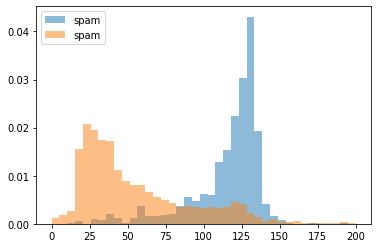

In [30]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density='normal', label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density='normal',label='spam')
plt.legend(loc='upper left')
plt.show()

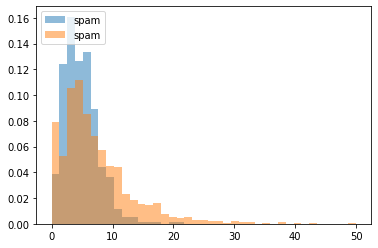

In [28]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density='normal', label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density='normal',label='spam')
plt.legend(loc='upper left')
plt.show()

In [33]:
## FULL DISTRIBUTION 
# To check which might be a good fit for transformation 


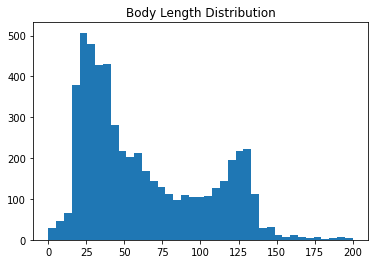

In [34]:
bins = np.linspace(0, 200, 40)
plt.hist(data['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

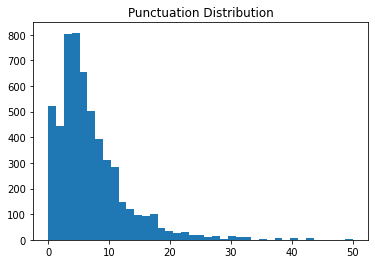

In [35]:
bins = np.linspace(0, 50, 40)
plt.hist(data['punct%'], bins)
plt.title('Punctuation Distribution')
plt.show()

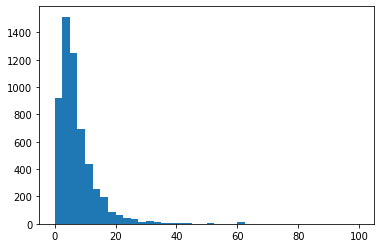

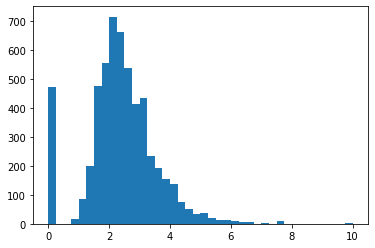

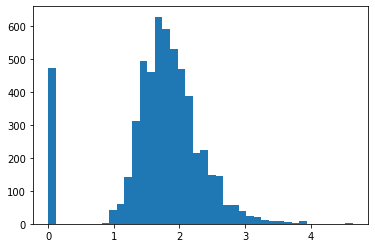

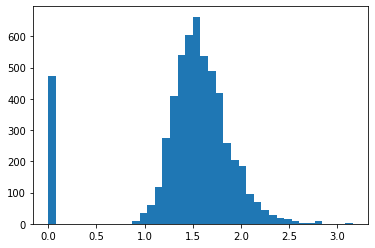

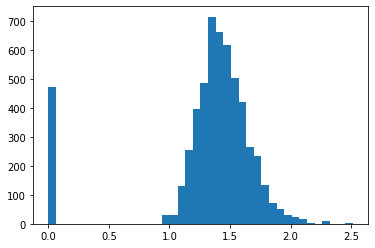

In [36]:
##Power Transformation

for i in range(1, 6):
    
    plt.hist((data['punct%'])**(1/i), bins=40)
    plt.show()